# Применение логистической регрессии для решения задачи классификации

# Описание набора данных

Данный набор содержит информацию о пассажирах корабля «Титаник», затонувшего в ночь на 15-е апреля 1912 года. Некоторое количество пассажиров спаслось, чему способствовало множество различных факторов, включая их пол, возраст, на какой палубе находилась их кабина, социальный статус, и т.д.

Набор данных состоит из различных признаков, описывающих информацию о пассажирах. Каждая строка таблицы — отдельный пассажир, вся информация о нем содержится в его строке.

Описание датасета:
- **Survived** (целевой признак): выжил ли пассажир (0 = Нет, 1 = Да);
- **Pclass**: класс каюты (1 = 1st, 2 = 2nd, 3 = 3rd);
- **Sex**: пол (female или male)
- **Age**: возраст в годах
- **SibSp**: количество братьев, сестёр (в том числе сводных) и супругов на борту
- **Parch**: количество детей и родителей на борту
- **Ticket**: номер билета
- **Fare**: стоимость проезда пассажира
- **Cabin**: номер каюты
- **Embarked**: порт посадки пассажира (C = Cherbourg, Q = Queenstown, S = Southampton).

Необходимо решить задачу классификации и научиться предсказывать целовой признак **Survived** — выживет ли пассажир — по соответсвующим ему нецелевым признакам.


# Подготовка и первичный анализ данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Установите количество пропущенных значений поля <code>age</code>:

In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     981 non-null    int64  
 1   survived   981 non-null    int64  
 2   name       981 non-null    object 
 3   sex        981 non-null    object 
 4   age        782 non-null    float64
 5   sibsp      981 non-null    int64  
 6   parch      981 non-null    int64  
 7   ticket     981 non-null    object 
 8   fare       981 non-null    float64
 9   cabin      212 non-null    object 
 10  embarked   981 non-null    object 
 11  home.dest  567 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 92.1+ KB


Определите долю выживших

In [4]:
data['survived'].mean()

0.382262996941896

Определите долю пропущенных значений в рамках каждого признака и избавьтесь от тех признаков, где доля пропусков больше трети. Также удалите колонку <code>ticket</code>, вряд ли эта информация будет полезной.

In [5]:
data.isna().sum()/981

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.202854
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin        0.783894
embarked     0.000000
home.dest    0.422018
dtype: float64

In [6]:
data.drop(['cabin', 'home.dest', 'ticket'], axis=1, inplace=True)

Из описания набора данных видно, что колонки <code>sibsp</code> и <code>parch</code> по сути отвечают за размер семьи. Замените эти две колонки на колонку <code>fam_size</code>, значения которой будут вычисляться как сумма соответствующих значений в колонках <code>sibsp</code> и <code>parch</code>.

In [7]:
data['fam_size'] = data['sibsp'] + data['parch']
data.drop(['sibsp', 'parch'], axis=1, inplace=True)

In [8]:
data['fam_size'].mean()

0.8664627930682977

Полученный датасет будем называть **исходным** (выброшенные на этом этапе признаки не нужно возвращать ни на одном из последующих этапов выполнения задания). Вычислите полученное число предикторов.

In [9]:
len(data.columns)-1

7

На основе имеющейся статистики оцените вероятность выжить если пассажир -- представитель определенной категории (указана в вашем индивидуальном задании)

In [10]:
data.loc[(data['pclass'] == 3) & (data['sex'] == 'male'), 'survived'].mean()

0.16442048517520216

Постройте гистограммы выжиших и невыживших по возрастам.

<Axes: >

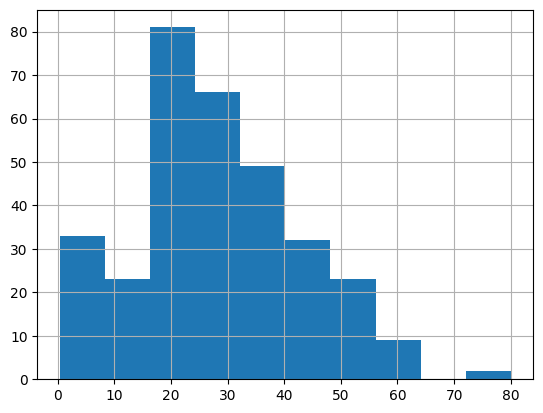

In [11]:
data.loc[data['survived'] == 1, 'age'].hist()

<Axes: >

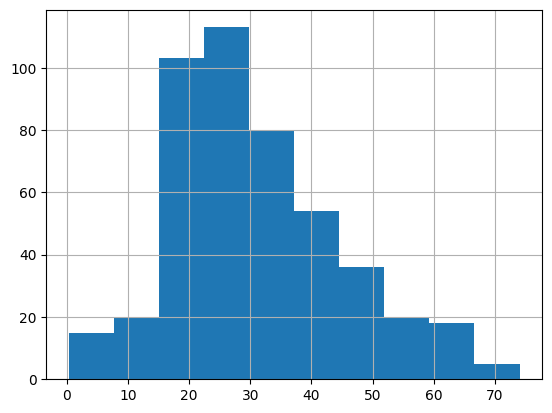

In [12]:
data.loc[data['survived'] == 0, 'age'].hist()

# Модель на основе числовых признаков

## Удаление строк с пропусками

В качестве базовой модели имеет смысл построить модель с минимальными трудозатратами.

Из исходного датасета удалите все категориальные признаки, а также строки, содержащие пропуски.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки<b> с параметрами, указанными в вашем задании</b>. Используйте стратификацию по колонке <code>survived</code>.

Обучите модель <code>LogisticRegression()</code> <b>с параметрами, указанными в вашем задании</b>, на тренировочных данных, оцените на тестовых.

Вычислите <code>f1_score</code> модели на тестовых данных (рекомендуем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">соответствующую функцию</a> с параметрами по умолчанию.



In [13]:
data.isna().sum()

pclass        0
survived      0
name          0
sex           0
age         199
fare          0
embarked      0
fam_size      0
dtype: int64

In [14]:
data_one = data.drop(['name', 'sex', 'embarked'], axis=1).dropna()

In [15]:
train_one, test_one = train_test_split(data_one, test_size=0.2, random_state=21, stratify=data_one['survived'])

In [16]:
x_train_one = train_one.drop(['survived'], axis=1)
y_train_one = train_one['survived']
x_test_one = test_one.drop(['survived'], axis=1)
y_test_one = test_one['survived']

In [17]:
logreg = LogisticRegression(random_state=21, max_iter=1000)

In [18]:
logreg.fit(x_train_one, y_train_one)
preds = logreg.predict(x_test_one)
f1_score(y_test_one, preds)

0.5660377358490566

## Заполнение пропусков средним

Качество полученной модели оставляет желать лучшего. Имеет смысл попробовать заполнить пропуски. Из исходного набора данных удалите категориальные признаки, а пропуски заполните средним по столбцу. Далее аналогично: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [19]:
data_two = data.drop(['name', 'sex', 'embarked'], axis=1)
for col in data_two.columns:
  data_two[col] = data_two[col].fillna(data_two[col].mean())

In [20]:
data_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    981 non-null    int64  
 1   survived  981 non-null    int64  
 2   age       981 non-null    float64
 3   fare      981 non-null    float64
 4   fam_size  981 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 38.4 KB


In [21]:
train_two, test_two = train_test_split(data_two, test_size=0.2, random_state=21, stratify=data_two['survived'])

In [22]:
x_train_two = train_two.drop(['survived'], axis=1)
y_train_two = train_two['survived']
x_test_two = test_two.drop(['survived'], axis=1)
y_test_two = test_two['survived']

In [23]:
logreg = LogisticRegression(random_state=21, max_iter=1000)
logreg.fit(x_train_two, y_train_two)
preds = logreg.predict(x_test_two)
f1_score(y_test_two, preds)

0.4761904761904762

## Заполнение пропусков на основе обращения


Очевидно, что заполнение пропусков в колонке <code>age</code> средним — не самая разумная идея. Возможно, стоит выполнить эту процедуру как-то более интеллектуально, например, с оглядкой на обращение к человеку.

Можно заметить, что исходный датасет в столбце <code>name</code> содержит информацию о социальном статусе пассажира, а именно присутсвуют обращения <code>Mr., Mrs., Dr.</code> и т.д. На основе этой информации можно попробовать сделать предположение о возрасте пассажира.

Верните в рассмотрение колонку <code>name</code>. Создайте отдельную колонку <code>honorific</code> и поместите туда значения обращений.

Вычислите число уникальных обращений.

In [24]:
data_three = data.drop(['embarked', 'sex'], axis=1)

In [25]:
d = []

for n in data["name"]:
  n1 = n.split(".")[0]
  d.append(n1.split(" ")[-1])

data["honorific"] = d

data.head()

,pclass,survived,name,sex,age,fare,embarked,fam_size,honorific
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0,Miss
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0,Miss
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0,Mrs
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0,Mr
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0,Mr


In [26]:
data["honorific"].nunique()

14

Скорее всего имеет смысл сократить число обращений, добавив малочисленные группы к более многочисленным, так как принципиальной разницы между, например, <code>Don</code> и <code>Mr</code>, видимо, нет. Отметим, что <code>Master</code> — это прежнее обращение к ребенку, с этим обращением будем работать отдельно.




Выполните следующие замены:

<code>Mr</code> $\leftarrow$ <code>['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt']</code>

<code>Mrs</code> $\leftarrow$ <code> ['Dona', 'Countess']</code>

<code>Miss</code> $\leftarrow$ <code> ['Mlle', 'Ms']</code>

In [27]:
data["honorific"] = data["honorific"].str.replace('Rev', 'Mr').replace('Col', 'Mr').replace('Dr', 'Mr').replace('Major', 'Mr').replace('Don', 'Mr').replace('Capt', 'Mr')

In [28]:
data["honorific"].nunique()

8

In [29]:
data["honorific"] = data["honorific"].str.replace('Dona', 'Mrs').replace('Countess', 'Mrs')
data["honorific"] = data["honorific"].str.replace('Mlle', 'Miss').replace('Ms', 'Miss')

In [30]:
data["honorific"].unique()

array(['Miss', 'Mrs', 'Mr', 'Master'], dtype=object)

Вычислите долю строк со значением <code>Master</code> относительно числа всех мужчин

In [31]:
data.loc[data['honorific'] == 'Master', 'survived'].count() / (data.loc[data['honorific'] == 'Master', 'survived'].count() + (data.loc[data['honorific'] == 'Mr', 'survived'].count()))

0.07232704402515723

Вычислите средний возраст категории, указанной в вашем индивидуальном задании

In [32]:
data.loc[data['honorific'] == 'Mr', 'age'].mean()

32.90043763676149

Заполните пропуски в колонке <code>age</code> средним, соответствующим среднему категории <code>honorific</code>.

Избавьтесь от нечисловых признаков. Далее аналогично: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [33]:
for honor in data['honorific'].unique():
    filtered_people = data.loc[data['honorific'] == honor] # отфильтрованные по категории

    # вставляем в пропуски среднюю высоту потолков
    data.loc[data['honorific'] == honor, 'age'] = \
        data.loc[data['honorific'] == honor, 'age'] \
        .fillna(filtered_people['age'].mean())

In [34]:
data.isna().sum()

pclass       0
survived     0
name         0
sex          0
age          0
fare         0
embarked     0
fam_size     0
honorific    0
dtype: int64

In [35]:
data.head()

,pclass,survived,name,sex,age,fare,embarked,fam_size,honorific
0,3,1,"Smyth, Miss. Julia",female,22.005765,7.7333,Q,0,Miss
1,3,1,"Glynn, Miss. Mary Agatha",female,22.005765,7.7500,Q,0,Miss
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.000000,7.2292,C,0,Mrs
3,3,0,"Vovk, Mr. Janko",male,22.000000,7.8958,S,0,Mr
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.000000,9.5000,S,0,Mr


In [36]:
data_last = data.drop(['name', 'honorific'], axis=1)
data.drop(['name', 'sex', 'honorific', 'embarked'], axis=1, inplace=True)

In [37]:
train, test = train_test_split(data, test_size=0.2, random_state=21, stratify=data['survived'])

x_train = train.drop(['survived'], axis=1)
y_train = train['survived']
x_test = test.drop(['survived'], axis=1)
y_test = test['survived']

logreg = LogisticRegression(random_state=21, max_iter=1000)
logreg.fit(x_train, y_train)
preds = logreg.predict(x_test)
f1_score(y_test, preds)

0.48818897637795283

# Модель с использование категориальных признаков

В исходном наборе данных заполните пропуски колонки <code>age</code> значениями на основе обращений (как в предыдущем пункте).

Не используйте признаки <code>name</code> и <code>honorific</code>. Они свою функцию выполнили.

Произведите <code>one-hot</code> кодировние нечисловых признаков, например, с помощью <code>pd.get_dummies(drop_first=True)</code>. Далее по знакомой схеме: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [38]:
data_last.head()

,pclass,survived,sex,age,fare,embarked,fam_size
0,3,1,female,22.005765,7.7333,Q,0
1,3,1,female,22.005765,7.7500,Q,0
2,3,1,female,38.000000,7.2292,C,0
3,3,0,male,22.000000,7.8958,S,0
4,3,0,male,16.000000,9.5000,S,0


In [39]:
data_last = pd.get_dummies(data_last, columns=['sex', 'embarked', 'pclass'], drop_first=True)

In [40]:
train, test = train_test_split(data_last, test_size=0.2, random_state=21, stratify=data_last['survived'])

x_train = train.drop(['survived'], axis=1)
y_train = train['survived']
x_test = test.drop(['survived'], axis=1)
y_test = test['survived']

logreg = LogisticRegression(random_state=21, max_iter=1000)
logreg.fit(x_train, y_train)
preds = logreg.predict(x_test)
f1_score(y_test, preds)

0.7354838709677418